In [1]:
# !pip install aiohttp

In [2]:
import aiohttp
import asyncio
import requests
import numpy as np
import pandas as pd
import datetime as dt

import matplotlib.pyplot as plt
plt.style.use("fast")

import warnings as wn
wn.filterwarnings("ignore")

In [3]:
tickers = {
    "COST": 0.1,
    "MA": 0.1,
    "MCO": 0.1,
    "UNH": 0.1,
    "MRK": 0.1,
    "NVO": 0.1,
    "AAPL": 0.1,
    "MSFT": 0.1,
    "AVGO": 0.1,
    "ODFL": 0.1,
    "SPY": 1,
    "QQQ": 1
}

In [4]:
total_portfolio_allocation = round(sum(val for key, val in tickers.items() if key not in ["SPY", "QQQ"]), 3) * 100

if total_portfolio_allocation != 100:
    raise Exception(f"Total portfolio allocation is {total_portfolio_allocation:.2f}% and should up to 100%")

In [5]:
headers = {
        "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) \
                       AppleWebKit/605.1.15 (KHTML, like Gecko) \
                       Chrome/100.0.4896.127 Safari/605.1.15 Firefox/100.0"
        }


def get_risk_free_rate():
    url = "https://query1.finance.yahoo.com/v8/finance/chart/^IRX"

    session = requests.Session()
    response = session.get(url=url, headers=headers)
    data = response.json()
    return data["chart"]["result"][0]["meta"]["regularMarketPrice"]


def get_price_history(ticker, data):
    try:
        data = data["chart"]["result"][0]
        lbls = [dt.datetime.fromtimestamp(i).date() for i in data["timestamp"]]
        rows = data["indicators"]["adjclose"][0]["adjclose"]
        df = pd.DataFrame(data=rows, index=lbls, columns=[ticker])
        return df
    except:
        return


async def get_response(ticker, session):
    url = f"https://query1.finance.yahoo.com/v8/finance/chart/{ticker}?range=30y&interval=1d"
    async with session.get(url, headers=headers) as response:
        data = await response.json()
        return get_price_history(ticker, data)


async def main(tickers):
    async with aiohttp.ClientSession() as session:
        return pd.concat(
            await asyncio.gather(*[asyncio.create_task(get_response(ticker, session)) for ticker in tickers]),
            axis=1
        )


df = await main(tickers)
df.dropna(inplace=True)
df

,COST,MA,MCO,UNH,MRK,NVO,AAPL,MSFT,AVGO,ODFL,SPY,QQQ
2009-08-06,35.668118,18.754679,20.463934,21.246344,17.287373,9.297338,4.975503,17.689688,11.773015,10.182975,76.601143,34.647575
2009-08-07,36.655846,19.020891,21.368595,21.679781,17.723095,8.957569,5.024071,17.765078,11.954923,10.610638,77.605759,35.087486
2009-08-10,36.143684,18.834726,21.125671,22.137745,18.017494,9.005447,5.000091,17.659519,11.620214,10.477717,77.444687,34.841141
2009-08-11,35.792500,18.867304,20.648214,22.751089,17.858517,9.016257,4.942720,17.440844,11.401924,10.688657,76.478470,34.541996
2009-08-12,36.093582,19.019033,20.974905,22.726561,18.099928,9.210854,5.018003,17.742468,11.642037,11.015182,77.299026,35.078693
...,...,...,...,...,...,...,...,...,...,...,...,...
2023-07-06,537.369995,393.140015,342.220001,469.359985,111.750000,158.320007,191.809998,341.269989,848.000000,366.059998,439.660004,367.459991
2023-07-07,525.049988,388.679993,339.570007,461.579987,109.000000,156.979996,190.679993,337.220001,846.750000,369.940002,438.549988,366.239990
2023-07-10,527.010010,392.160004,342.100006,463.049988,109.959999,157.070007,188.610001,331.829987,877.729980,374.750000,439.660004,366.359985
2023-07-11,529.640015,397.799988,339.260010,462.890015,108.699997,152.250000,188.080002,332.470001,882.049988,377.910004,442.459991,368.170013


In [6]:
initial_balance = 10_000
monthly_contribution = 1_000

In [7]:
start_date = "2013-01-01"

In [8]:
dff = df.loc[df.index > pd.to_datetime(start_date)] if start_date else df    # dff -> DataFrame Filtered
dff.index = pd.to_datetime(dff.index)
dff.head()

,COST,MA,MCO,UNH,MRK,NVO,AAPL,MSFT,AVGO,ODFL,SPY,QQQ
2013-01-02,83.025902,47.876877,45.945965,46.410885,28.335188,26.935539,16.813856,22.668232,24.458391,23.100245,120.399696,61.144386
2013-01-03,83.877045,47.945366,46.132343,44.240967,29.013742,26.857603,16.601631,22.364565,24.586168,22.853180,120.127701,60.825939
2013-01-04,83.606949,47.943489,46.833458,44.326061,28.766994,27.016733,16.139198,21.945997,24.428328,23.106745,120.655220,60.625763
2013-01-07,82.960442,48.774345,46.620461,44.326061,28.869810,27.109283,16.044264,21.904961,24.293026,23.256283,120.325493,60.643967
2013-01-08,82.804932,48.613789,46.868977,43.738888,28.910934,27.375586,16.087439,21.790060,24.127665,22.853180,119.979286,60.525688


In [9]:
df1 = dff[~dff.index.to_period("M").duplicated()]
df1.head()

,COST,MA,MCO,UNH,MRK,NVO,AAPL,MSFT,AVGO,ODFL,SPY,QQQ
2013-01-02,83.025902,47.876877,45.945965,46.410885,28.335188,26.935539,16.813856,22.668232,24.458391,23.100245,120.399696,61.144386
2013-02-01,85.235565,48.697361,49.123211,47.457558,28.671047,30.947939,13.891958,22.922653,27.254494,24.426573,124.669670,61.562973
2013-03-01,83.222908,48.658875,43.612320,45.542912,29.219376,28.513872,13.259830,23.128986,25.330294,23.022223,125.386757,61.308178
2013-04-01,86.825211,50.436054,47.034992,50.375370,30.691296,26.872202,13.211777,23.675144,26.704189,24.361551,129.206726,62.471500
2013-05-01,88.802826,50.736179,54.192291,51.016064,31.618624,28.497814,13.531512,27.076223,23.666538,24.088490,131.053162,64.195137


In [10]:
for col in df1.columns:
    shares = f"{col}_shares"
    df1[shares] = [monthly_contribution * tickers[col] / i for i in df1[col]]
    if initial_balance:
        df1[shares][0] += initial_balance * tickers[col] / df1[col][0]
    df1[shares] = df1[shares].cumsum()

df1.head()

,COST,MA,MCO,UNH,MRK,NVO,AAPL,MSFT,AVGO,ODFL,...,MCO_shares,UNH_shares,MRK_shares,NVO_shares,AAPL_shares,MSFT_shares,AVGO_shares,ODFL_shares,SPY_shares,QQQ_shares
2013-01-02,83.025902,47.876877,45.945965,46.410885,28.335188,26.935539,16.813856,22.668232,24.458391,23.100245,...,23.941167,23.701337,38.820988,40.838239,65.422232,48.526061,44.974340,47.618544,91.362357,179.902043
2013-02-01,85.235565,48.697361,49.123211,47.457558,28.671047,30.947939,13.891958,22.922653,27.254494,24.426573,...,25.976864,25.808482,42.308827,44.069472,72.620641,52.888557,48.643460,51.712446,99.383554,196.145573
2013-03-01,83.222908,48.658875,43.612320,45.542912,29.219376,28.513872,13.259830,23.128986,25.330294,23.022223,...,28.269794,28.004214,45.731214,47.576537,80.162216,57.212136,52.591302,56.056075,107.358878,212.456610
2013-04-01,86.825211,50.436054,47.034992,50.375370,30.691296,26.872202,13.211777,23.675144,26.704189,24.361551,...,30.395871,29.989311,48.989467,51.297855,87.731221,61.435976,56.336033,60.160904,115.098413,228.463910
2013-05-01,88.802826,50.736179,54.192291,51.016064,31.618624,28.497814,13.531512,27.076223,23.666538,24.088490,...,32.241152,31.949478,52.152160,54.806896,95.121378,65.129253,60.561408,64.312264,122.728904,244.041414


In [11]:
months = df1.shape[0]
months

127

In [12]:
df2 = dff.merge(df1, how="left").fillna(method="ffill").set_index(dff.index)
df2.head()

,COST,MA,MCO,UNH,MRK,NVO,AAPL,MSFT,AVGO,ODFL,...,MCO_shares,UNH_shares,MRK_shares,NVO_shares,AAPL_shares,MSFT_shares,AVGO_shares,ODFL_shares,SPY_shares,QQQ_shares
2013-01-02,83.025902,47.876877,45.945965,46.410885,28.335188,26.935539,16.813856,22.668232,24.458391,23.100245,...,23.941167,23.701337,38.820988,40.838239,65.422232,48.526061,44.97434,47.618544,91.362357,179.902043
2013-01-03,83.877045,47.945366,46.132343,44.240967,29.013742,26.857603,16.601631,22.364565,24.586168,22.853180,...,23.941167,23.701337,38.820988,40.838239,65.422232,48.526061,44.97434,47.618544,91.362357,179.902043
2013-01-04,83.606949,47.943489,46.833458,44.326061,28.766994,27.016733,16.139198,21.945997,24.428328,23.106745,...,23.941167,23.701337,38.820988,40.838239,65.422232,48.526061,44.97434,47.618544,91.362357,179.902043
2013-01-07,82.960442,48.774345,46.620461,44.326061,28.869810,27.109283,16.044264,21.904961,24.293026,23.256283,...,23.941167,23.701337,38.820988,40.838239,65.422232,48.526061,44.97434,47.618544,91.362357,179.902043
2013-01-08,82.804932,48.613789,46.868977,43.738888,28.910934,27.375586,16.087439,21.790060,24.127665,22.853180,...,23.941167,23.701337,38.820988,40.838239,65.422232,48.526061,44.97434,47.618544,91.362357,179.902043


In [13]:
price_cols = [i for i in df2.columns if i in list(tickers.keys())]
share_cols = [i for i in df2.columns if "shares" in i]

In [14]:
for price, share in zip(price_cols, share_cols):
    value = f"{price}_value"
    df2[value] = df2[price] * df2[share]

df2.head()

,COST,MA,MCO,UNH,MRK,NVO,AAPL,MSFT,AVGO,ODFL,...,MCO_value,UNH_value,MRK_value,NVO_value,AAPL_value,MSFT_value,AVGO_value,ODFL_value,SPY_value,QQQ_value
2013-01-02,83.025902,47.876877,45.945965,46.410885,28.335188,26.935539,16.813856,22.668232,24.458391,23.100245,...,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,11000.000000,11000.000000
2013-01-03,83.877045,47.945366,46.132343,44.240967,29.013742,26.857603,16.601631,22.364565,24.586168,22.853180,...,1104.462118,1048.570042,1126.342158,1096.817224,1086.115769,1085.264233,1105.746691,1088.235144,10975.149846,10942.710714
2013-01-04,83.606949,47.943489,46.833458,44.326061,28.766994,27.016733,16.139198,21.945997,24.428328,23.106745,...,1121.247621,1050.586894,1116.763158,1103.315817,1055.862379,1064.952794,1098.647908,1100.309532,11023.345246,10906.698600
2013-01-07,82.960442,48.774345,46.620461,44.326061,28.869810,27.109283,16.044264,21.904961,24.293026,23.256283,...,1116.148214,1050.586894,1120.754562,1107.095407,1049.651555,1062.961449,1092.562808,1107.430316,10993.220594,10909.973489
2013-01-08,82.804932,48.613789,46.868977,43.738888,28.910934,27.375586,16.087439,21.790060,24.127665,22.853180,...,1122.097979,1036.670098,1122.351050,1117.970717,1052.476143,1057.385776,1085.125788,1088.235144,10961.590337,10888.694944


In [15]:
spy = df2.pop("SPY_value")
qqq = df2.pop("QQQ_value")

In [16]:
value_cols = [i for i in df2.columns if "value" in i]

In [17]:
df3 = pd.DataFrame(index=df2.index)

df3["SPY"] = spy
df3["QQQ"] = qqq
df3["Portfolio"] = list(map(sum, df2[value_cols].values))
df3.head()

,SPY,QQQ,Portfolio
2013-01-02,11000.000000,11000.000000,11000.000000
2013-01-03,10975.149846,10942.710714,10954.403645
2013-01-04,11023.345246,10906.698600,10920.914781
2013-01-07,10993.220594,10909.973489,10926.943810
2013-01-08,10961.590337,10888.694944,10896.316079


In [18]:
total_investments = initial_balance + monthly_contribution * months

print(f"Total Investments: {total_investments} $")

Total Investments: 137000 $


In [19]:
spy_end = df3["SPY"].iloc[-1]
qqq_end = df3["QQQ"].iloc[-1]
portfolio_end = df3["Portfolio"].iloc[-1]

print(f"SPY Market Value: {spy_end:.2f} $")
print(f"QQQ Market Value: {qqq_end:.2f} $")
print(f"Portfolio Market Value: {portfolio_end:.2f} $")

SPY Market Value: 286724.11 $
QQQ Market Value: 407261.04 $
Portfolio Market Value: 650467.60 $


In [20]:
spy_net = spy_end - total_investments
qqq_net = qqq_end - total_investments
portfolio_net = portfolio_end - total_investments

print(f"SPY Net Asset Value:  {spy_net:.2f} $")
print(f"QQQ Net Asset Value:  {qqq_net:.2f} $")
print(f"Portfolio Net Asset Value:  {portfolio_net:.2f} $")

SPY Net Asset Value:  149724.11 $
QQQ Net Asset Value:  270261.04 $
Portfolio Net Asset Value:  513467.60 $


In [21]:
spy_cagr = ((spy_end / initial_balance) ** (12 / months) - 1) * 100
qqq_cagr = ((qqq_end / initial_balance) ** (12 / months) - 1) * 100
portfolio_cagr = ((portfolio_end / initial_balance) ** (12 / months) - 1) * 100

print(f"SPY CAGR: {spy_cagr:.2f} %")
print(f"QQQ CAGR: {qqq_cagr:.2f} %")
print(f"Portfolio CAGR: {portfolio_cagr:.2f} %")

SPY CAGR: 37.31 %
QQQ CAGR: 41.94 %
Portfolio CAGR: 48.36 %


In [22]:
daily_returns = df3.pct_change()

In [23]:
annual_returns = daily_returns.mean() * 252

spy_return = annual_returns[0] * 100
qqq_return = annual_returns[1] * 100
portfolio_return = annual_returns[2] * 100

print(f"SPY Annualized Average Return: {spy_return:.2f} %")
print(f"QQQ Annualized Average Return: {qqq_return:.2f} %")
print(f"Portfolio Annualized Average Return: {portfolio_return:.2f} %")

SPY Annualized Average Return: 32.84 %
QQQ Annualized Average Return: 36.91 %
Portfolio Annualized Average Return: 41.07 %


In [24]:
std = daily_returns.std() * np.sqrt(252)

spy_std = std[0] * 100
qqq_std = std[1] * 100
portfolio_std = std[2] * 100

print(f"SPY Annualized Standard Deviation: {spy_std:.2f} %")
print(f"QQQ Annualized Standard Deviation: {qqq_std:.2f} %")
print(f"Portfolio Annualized Standard Deviation: {portfolio_std:.2f} %")

SPY Annualized Standard Deviation: 18.97 %
QQQ Annualized Standard Deviation: 22.44 %
Portfolio Annualized Standard Deviation: 21.09 %


In [25]:
risk_free_rate = get_risk_free_rate()

spy_sharpe = (spy_return - risk_free_rate) / spy_std
qqq_sharpe = (qqq_return - risk_free_rate) / qqq_std
portfolio_sharpe = (portfolio_return - risk_free_rate) / portfolio_std

print(f"SPY Sharpe Ratio: {spy_sharpe:.2f}")
print(f"QQQ Sharpe Ratio: {qqq_sharpe:.2f}")
print(f"Portfolio Sharpe Ratio: {portfolio_sharpe:.2f}")

SPY Sharpe Ratio: 1.46
QQQ Sharpe Ratio: 1.41
Portfolio Sharpe Ratio: 1.70


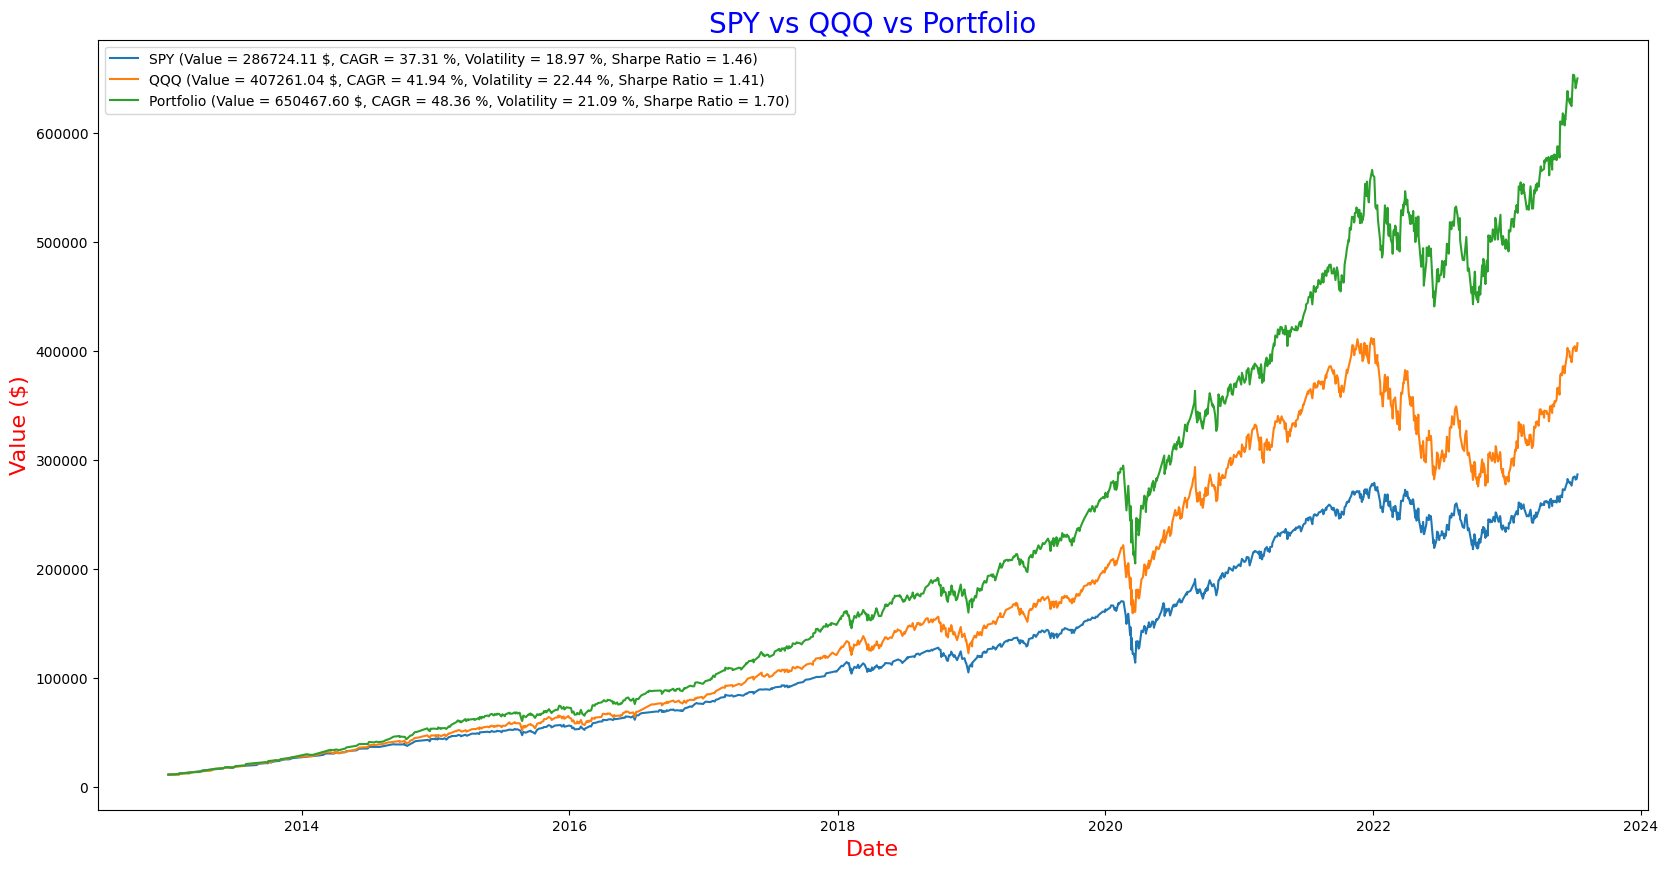

In [26]:
plt.figure(figsize=(20, 10))
plt.plot(df3.index, df3["SPY"], label=f"SPY (Value = {spy_end:.2f} $, CAGR = {spy_cagr:.2f} %, Volatility = {spy_std:.2f} %, Sharpe Ratio = {spy_sharpe:.2f})")
plt.plot(df3.index, df3["QQQ"], label=f"QQQ (Value = {qqq_end:.2f} $, CAGR = {qqq_cagr:.2f} %, Volatility = {qqq_std:.2f} %, Sharpe Ratio = {qqq_sharpe:.2f})")
plt.plot(df3.index, df3["Portfolio"], label=f"Portfolio (Value = {portfolio_end:.2f} $, CAGR = {portfolio_cagr:.2f} %, Volatility = {portfolio_std:.2f} %, Sharpe Ratio = {portfolio_sharpe:.2f})")
plt.xlabel("Date", size=16, color="red")  # Add an x-label to the axes.
plt.ylabel("Value ($)", size=16, color="red")  # Add a y-label to the axes.
plt.title("SPY vs QQQ vs Portfolio", size=20, color="blue")  # Add a title to the axes.
plt.legend()
plt.show();